
## Ban405
## Mandatory assignment 2 

### **Wrangle and Visualize Global COVID-19 Deaths**


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

DATA_DIR = Path("data")
PLOTS_DIR = Path("plots")
PLOTS_DIR.mkdir(exist_ok=True)  #makes plots if it doesn't exist



### **Task 1: Data wrangling**

In [2]:

# Task 1.1: Load and explore the data
deaths_raw = pd.read_csv(DATA_DIR / "time_series_covid19_deaths_global.csv", sep=None, engine="python")

# Basic exploration
print(f"Dataset shape: {deaths_raw.shape}")
print(f"First 10 columns: {list(deaths_raw.columns)[:10]}")
display(deaths_raw.head(), deaths_raw.tail())

# Dataset info
print("\nDataset Info:")
deaths_raw.info()

# Additional exploration
print(f"\nNumber of unique countries: {deaths_raw['Country/Region'].nunique()}")
print("\nMissing values in key columns:")
print(deaths_raw[["Province/State", "Country/Region", "Lat", "Long"]].isna().sum())


Dataset shape: (289, 1147)
First 10 columns: ['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20']


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4057,4057,4057,4057,4057,4057,4057,4057,4057,4057
288,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,5663,5668,5668,5668,5668,5668,5668,5668,5671,5671



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB

Number of unique countries: 201

Missing values in key columns:
Province/State    198
Country/Region      0
Lat                 2
Long                2
dtype: int64


In [3]:

# Task 1.2: Reshape data from wide to long format
meta_cols = ["Province/State", "Country/Region", "Lat", "Long"]
date_cols = [col for col in deaths_raw.columns if col not in meta_cols]

# Reshape the data
deaths_long = deaths_raw.melt(
    id_vars=meta_cols,          # Keep metadata columns unchanged
    value_vars=date_cols,       # Unpivot these date columns
    var_name="date_str",        # New column for the dates
    value_name="total_deaths"   # New column for cumulative deaths
)

# Display the first few rows of the reshaped DataFrame
display(deaths_long.head())


,Province/State,Country/Region,Lat,Long,date_str,total_deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [4]:

# Task 1.3: Convert date strings to datetime and clean numeric data

# Convert date strings to datetime objects
deaths_long["date"] = pd.to_datetime(deaths_long["date_str"], format="%m/%d/%y")

# Ensure total deaths are numeric, filling missing values with 0
deaths_long["total_deaths"] = (
    pd.to_numeric(deaths_long["total_deaths"], errors="coerce")
    .fillna(0)
    .astype(int)
)

# Drop the original date_str column as it's no longer needed
deaths_long.drop(columns=["date_str"], inplace=True)

display(deaths_long.head())


,Province/State,Country/Region,Lat,Long,total_deaths,date
0,NaN,Afghanistan,33.93911,67.709953,0,2020-01-22
1,NaN,Albania,41.15330,20.168300,0,2020-01-22
2,NaN,Algeria,28.03390,1.659600,0,2020-01-22
3,NaN,Andorra,42.50630,1.521800,0,2020-01-22
4,NaN,Angola,-11.20270,17.873900,0,2020-01-22


In [5]:

# Task 1.4: Aggregate data to the country level
country_daily = (
    deaths_long
    .groupby(["Country/Region", "date"], as_index=False)  # Group by country and date
    .agg(total_deaths=("total_deaths", "sum"))            # Sum total deaths for each group
    .sort_values(by=["Country/Region", "date"])           # Sort by country and date
)

display(country_daily.head())


,Country/Region,date,total_deaths
0,Afghanistan,2020-01-22,0
1,Afghanistan,2020-01-23,0
2,Afghanistan,2020-01-24,0
3,Afghanistan,2020-01-25,0
4,Afghanistan,2020-01-26,0


In [6]:

# Task 1.5: Calculate daily new deaths using diff()
country_daily["new_deaths"] = (
    country_daily
    .groupby("Country/Region")["total_deaths"]  # Group by country
    .diff()                                    # Calculate daily differences
    .fillna(0)                                 # Replace NaN with 0 for the first row of each group
    .clip(lower=0)                             # Ensure no negative values
    .astype(int)                               # Convert to integer
)

display(country_daily.head(10))


,Country/Region,date,total_deaths,new_deaths
0,Afghanistan,2020-01-22,0,0
1,Afghanistan,2020-01-23,0,0
2,Afghanistan,2020-01-24,0,0
3,Afghanistan,2020-01-25,0,0
4,Afghanistan,2020-01-26,0,0
5,Afghanistan,2020-01-27,0,0
6,Afghanistan,2020-01-28,0,0
7,Afghanistan,2020-01-29,0,0
8,Afghanistan,2020-01-30,0,0
9,Afghanistan,2020-01-31,0,0


### **Task 2: Data visualization**


Top 3 countries by total deaths: ['US', 'Brazil', 'India']


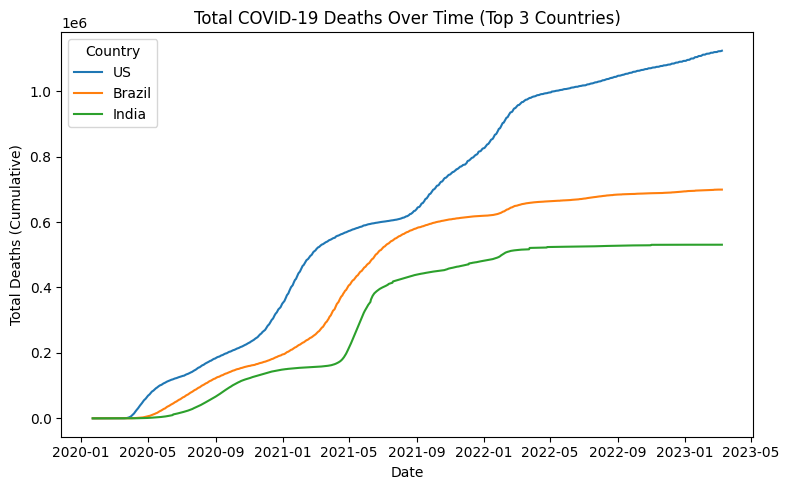

In [7]:

# Task 2.1a: Plot total deaths for the top 3 countries
latest_date = country_daily["date"].max()
top3 = (
    country_daily[country_daily["date"] == latest_date]
    .nlargest(3, "total_deaths")["Country/Region"]
)

print("Top 3 countries by total deaths:", top3.tolist())

# Plot cumulative deaths over time for the top 3 countries
plt.figure(figsize=(8, 5))
for country in top3:
    country_data = country_daily[country_daily["Country/Region"] == country]
    plt.plot(country_data["date"], country_data["total_deaths"], label=country)

plt.title("Total COVID-19 Deaths Over Time (Top 3 Countries)")
plt.xlabel("Date")
plt.ylabel("Total Deaths (Cumulative)")
plt.legend(title="Country")
plt.tight_layout()
plt.show()


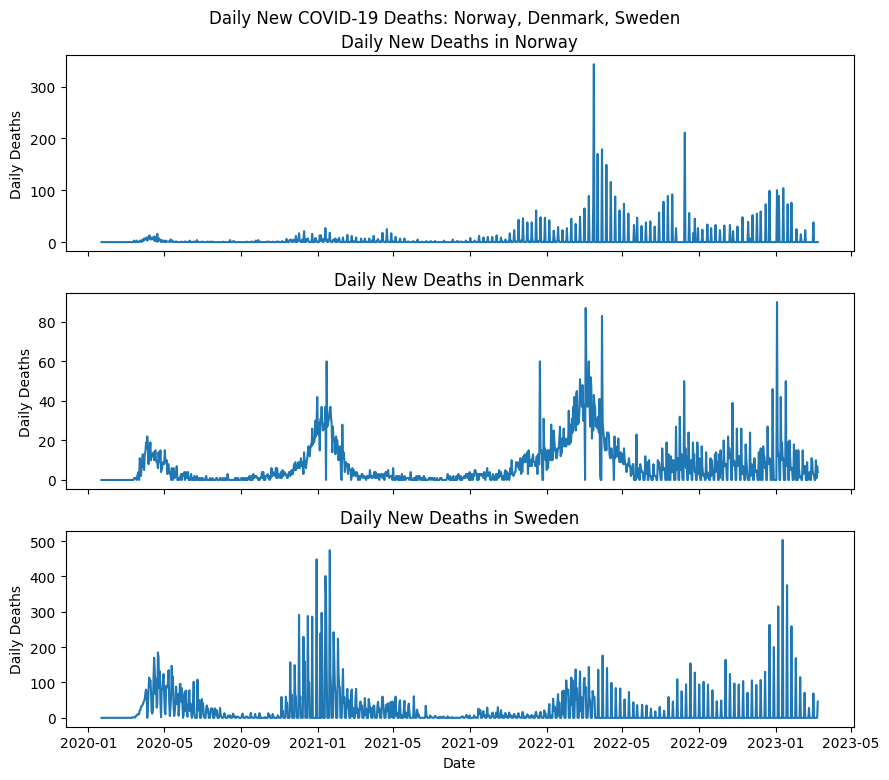

In [8]:

# Task 2.1b: Plot daily new deaths for Norway, Denmark, Sweden
nordics = ["Norway", "Denmark", "Sweden"]

fig, axes = plt.subplots(3, 1, figsize=(9, 8), sharex=True)
for ax, country in zip(axes, nordics):
    country_data = country_daily[country_daily["Country/Region"] == country]
    ax.plot(country_data["date"], country_data["new_deaths"])
    ax.set_title(f"Daily New Deaths in {country}")
    ax.set_ylabel("Daily Deaths")

axes[-1].set_xlabel("Date")
fig.suptitle("Daily New COVID-19 Deaths: Norway, Denmark, Sweden", y=0.97)
fig.tight_layout()
plt.show()



Test: ['Norway', 'Denmark', 'Sweden']


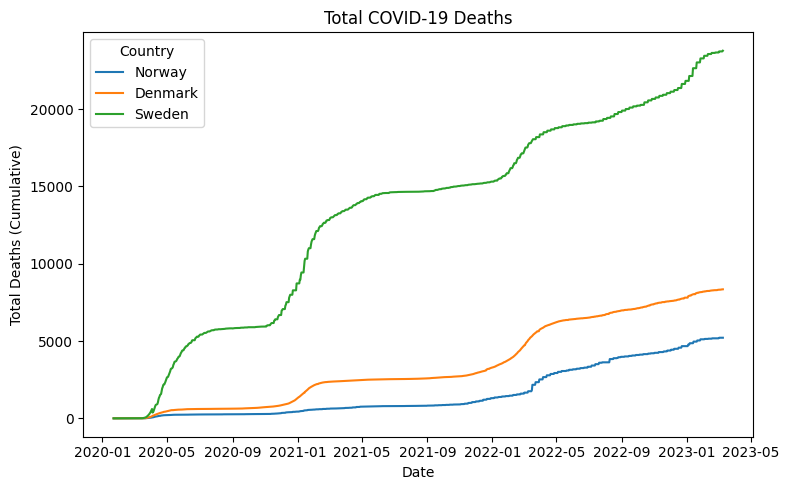


Test: ['Norway', 'Denmark', 'Atlantis']


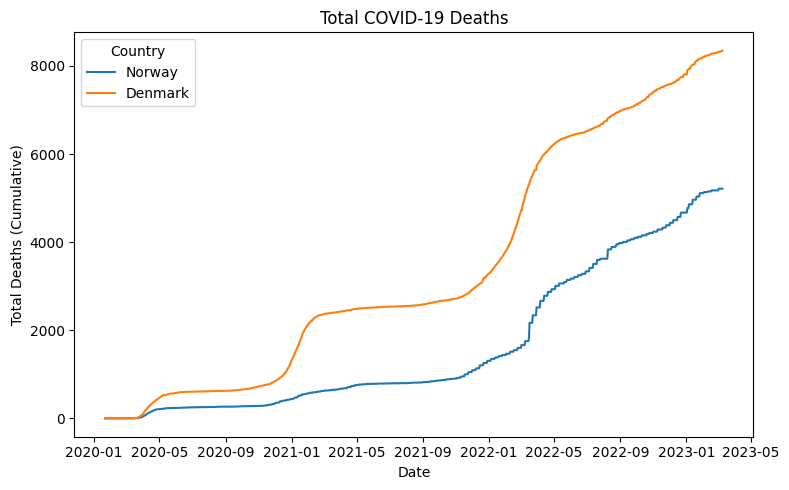


Test: ['The moon', 'Mars', 'Atlantis']
No valid countries to plot.

Test: []
No countries provided. Nothing to plot.


In [15]:

# Task 2.2, Reusable plotting function

def plot_total_deaths(countries, data):
    """
    Plot cumulative total deaths for a given list of countries.
    
    Parameters:
        countries (list or tuple): List of country names to plot.
        data (DataFrame): DataFrame containing 'Country/Region', 'date', and 'total_deaths' columns.
    """
    # Input validation
    if not isinstance(countries, (list, tuple)):
        raise TypeError("`countries` must be a list or tuple of strings.")
    if not countries:
        print("No countries provided. Nothing to plot.")
        return

    # Filter valid and unknown countries
    known_countries = set(data["Country/Region"].unique())
    valid_countries = [c for c in countries if c in known_countries]
    unknown_countries = [c for c in countries if c not in known_countries]

    if unknown_countries:
        print("Warning: unknown countries ignored:", unknown_countries)
    if not valid_countries:
        print("No valid countries to plot.")
        return

    # Plot total deaths for valid countries
    plt.figure(figsize=(8, 5))
    for country in valid_countries:
        country_data = data[data["Country/Region"] == country]
        plt.plot(country_data["date"], country_data["total_deaths"], label=country)

    # Add labels, title, and legend
    plt.title("Total COVID-19 Deaths")
    plt.xlabel("Date")
    plt.ylabel("Total Deaths (Cumulative)")
    plt.legend(title="Country")
    plt.tight_layout()
    plt.show()

# Testing the function
test_cases = [
    ['Norway', 'Denmark', 'Sweden'],    # All valid countries
    ['Norway', 'Denmark', 'Atlantis'],  # Mix of valid and unknown countries
    ['The moon', 'Mars', 'Atlantis'],   # Only unknown countries
    []                                  #Empty list
]
  
for test in test_cases:
    print("\nTest:", test)
    plot_total_deaths(test, country_daily)

### **Task 3: Data merging**

In [10]:

# Task 3.1: Load and explore the "Countries Continents" file

cc = pd.read_csv(DATA_DIR / "Countries Continents.csv", sep=None, engine="python")

# Check the dataset shape and column names
print(f"Dataset shape: {cc.shape}")  # Number of rows and columns
print(f"Columns: {list(cc.columns)}")  # List of column names
display(cc.head())  # Preview the first few rows of the dataset

# Display dataset information (dtypes and non-null counts)
print("\nDataset Info:")
cc.info()

# Check for missing values in each column
print("\nMissing values per column:")
print(cc.isna().sum())

# Identify the column for continent/region and display its unique values
for col in ["continent", "Continent", "region", "Region"]:  
    if col in cc.columns:  # Check if the column exists in the dataset
        print(f"\nUnique values in '{col}': {sorted(cc[col].dropna().unique())}")
        break  # Stop checking once the relevant column is found


Dataset shape: (285, 3)
Columns: ['Entity', 'Year', 'Countries Continents']


,Entity,Year,Countries Continents
0,Abkhazia,2015,Asia
1,Afghanistan,2015,Asia
2,Akrotiri and Dhekelia,2015,Asia
3,Albania,2015,Europe
4,Algeria,2015,Africa



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Entity                285 non-null    object
 1   Year                  285 non-null    int64 
 2   Countries Continents  285 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.8+ KB

Missing values per column:
Entity                  0
Year                    0
Countries Continents    0
dtype: int64


In [11]:

# Task 3.2: Prepare keys and left join continents onto COVID time series

# Identify and clean country/continent columns in cc
cols_lower = {c.lower(): c for c in cc.columns}  # Map lowercase column names to original names
country_col = next((cols_lower[k] for k in ["country", "location", "name", "country name"] if k in cols_lower), cc.columns[0])
continent_col = next((cols_lower[k] for k in ["continent", "region"] if k in cols_lower), cc.columns[-1])

# Rename and clean columns in continents DataFrame
continents = cc.rename(columns={country_col: "country", continent_col: "continent"})[["country", "continent"]]
continents["country"] = continents["country"].astype(str).str.strip()
continents["continent"] = continents["continent"].astype(str).str.strip()

# Harmonize country names in COVID data
try:
    country_daily_merge = country_daily.copy()
except NameError:
    print("Error: country_daily is not defined. Please run Task 1 first.")
    raise

name_map = {"US": "United States", "Korea, South": "South Korea", "Taiwan*": "Taiwan"}
country_daily_merge["country_std"] = country_daily_merge["Country/Region"].replace(name_map)

# Perform the left join
merged = country_daily_merge.merge(
    continents.rename(columns={"country": "country_std"}),
    on="country_std",
    how="left"
)

# Check coverage
coverage = merged[["Country/Region", "country_std", "continent"]].drop_duplicates()
missing = coverage["continent"].isna().sum()
total_countries = coverage.shape[0]
assigned_countries = total_countries - missing

print(f"Countries with continent assigned: {assigned_countries}/{total_countries} (Missing: {missing})")
if missing > 0:
    print("Countries missing continent assignment:")
    display(coverage[coverage["continent"].isna()].head(15))
else:
    print("All countries have a continent assigned!")


Countries with continent assigned: 188/201 (Missing: 13)
Countries missing continent assignment:


,Country/Region,country_std,continent
32004,Burma,Burma,NaN
34290,Cabo Verde,Cabo Verde,NaN
45720,Congo (Brazzaville),Congo (Brazzaville),NaN
46863,Congo (Kinshasa),Congo (Kinshasa),NaN
56007,Diamond Princess,Diamond Princess,NaN
86868,Holy See,Holy See,NaN
106299,"Korea, North","Korea, North",NaN
122301,MS Zaandam,MS Zaandam,NaN
134874,Micronesia,Micronesia,NaN
194310,Summer Olympics 2020,Summer Olympics 2020,NaN


In [12]:

# Task 3.3: Total deaths per continent
latest_date = merged["date"].max()

# Filter data for the latest date and group by continent
continent_totals = (
    merged.loc[(merged["date"] == latest_date) & (merged["continent"].notna())]  
    .groupby("continent", as_index=False)["total_deaths"]
    .sum()
    .sort_values("total_deaths", ascending=False)
)

# Display results
display(continent_totals)

# Print the continent with the highest total deaths
highest_continent = continent_totals.iloc[0]["continent"]
print("Highest total deaths (continent):", highest_continent)


,continent,total_deaths
3,Europe,2038931
2,Asia,1598342
4,North America,1587146
6,South America,1350329
0,Africa,255440
5,Oceania,23931
1,Antarctica,0


Highest total deaths (continent): Europe


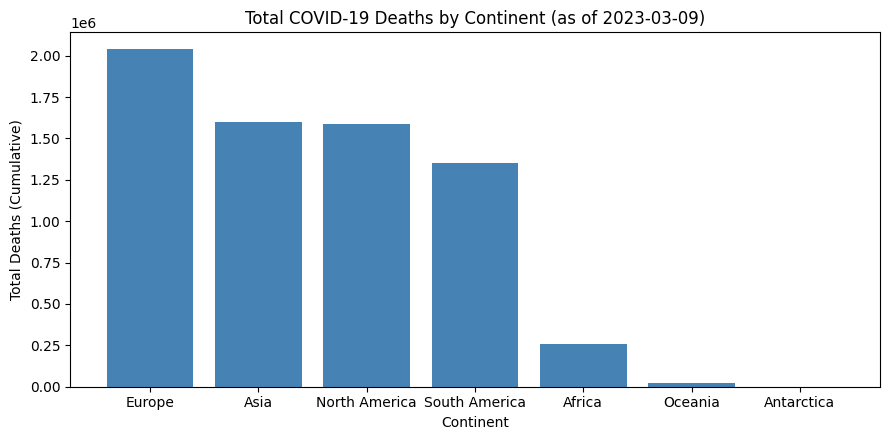

In [13]:

# Task 3.4: Bar plot of total COVID-19 deaths per continent

plt.figure(figsize=(9, 4.5))
plt.bar(continent_totals["continent"], continent_totals["total_deaths"], color="steelblue")
plt.title(f"Total COVID-19 Deaths by Continent (as of {latest_date.date()})")
plt.xlabel("Continent")
plt.ylabel("Total Deaths (Cumulative)")
plt.tight_layout()
plt.savefig(PLOTS_DIR / "continent_bar_plot.png")
plt.show()

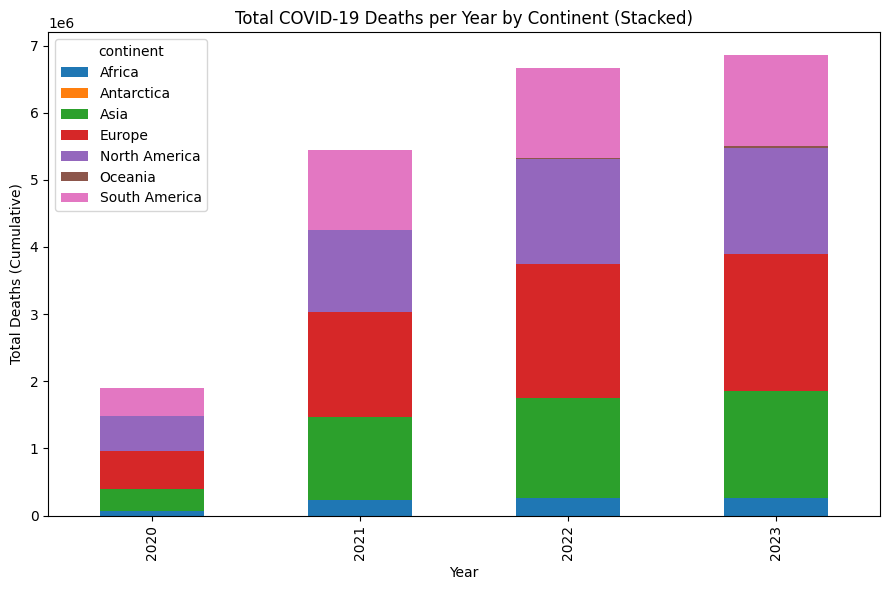

In [14]:

# Task 3.5: Stacked bar plot of total deaths per year by continent

# Add a 'year' column
merged["year"] = merged["date"].dt.year

# Get last date of each year and filter the data
last_dates = merged.groupby("year")["date"].max().reset_index(name="last_date")
year_end = merged.merge(last_dates, on="year")
year_end = year_end[year_end["date"] == year_end["last_date"]]

# Group by year and continent, summing total deaths
by_year_continent = (
    year_end.dropna(subset=["continent"])
    .groupby(["year", "continent"], as_index=False)["total_deaths"]
    .sum()
)

# Pivot for stacked bar chart
pivot = by_year_continent.pivot(index="year", columns="continent", values="total_deaths").fillna(0)

# Plot stacked bar chart
ax = pivot.plot(kind="bar", stacked=True, figsize=(9, 6)) 
ax.set_title("Total COVID-19 Deaths per Year by Continent (Stacked)")
ax.set_xlabel("Year")
ax.set_ylabel("Total Deaths (Cumulative)")
plt.tight_layout()
plt.savefig(PLOTS_DIR / "continent_stacked_plot.png")
plt.show()


Use of AI: 

I used ChatGPT and BANi to assist with understanding and refining my code for this assignment. The AI gave me guidance, explanations of programming concepts, code simplifications, and suggestions for improving readability and structure.

All final implementations and modifications were reviewed and executed by me, to ensure they align my understanding of the material.